<a href="https://colab.research.google.com/github/Ekram49/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Ekram_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
##### Your Code Here #####

from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
# import statements
import os
import datetime
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [4]:
inputs = x_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit Model
results = model.fit(x_train, y_train, 
          validation_data=(x_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size
         )

Epoch 1/75
41/41 [==============================] - 0s 5ms/step - loss: 536.4283 - mae: 21.1431 - val_loss: 481.2335 - val_mae: 19.8471
Epoch 2/75
41/41 [==============================] - 0s 2ms/step - loss: 335.1765 - mae: 15.7769 - val_loss: 205.5677 - val_mae: 12.2889
Epoch 3/75
41/41 [==============================] - 0s 2ms/step - loss: 107.4552 - mae: 8.0585 - val_loss: 69.4543 - val_mae: 6.4518
Epoch 4/75
41/41 [==============================] - 0s 2ms/step - loss: 47.1853 - mae: 4.9117 - val_loss: 37.9270 - val_mae: 4.8110
Epoch 5/75
41/41 [==============================] - 0s 2ms/step - loss: 30.6886 - mae: 3.8700 - val_loss: 27.9048 - val_mae: 4.1740
Epoch 6/75
41/41 [==============================] - 0s 2ms/step - loss: 24.8108 - mae: 3.4719 - val_loss: 24.9962 - val_mae: 3.9185
Epoch 7/75
41/41 [==============================] - 0s 2ms/step - loss: 21.4561 - mae: 3.2236 - val_loss: 22.5940 - val_mae: 3.7109
Epoch 8/75
41/41 [==============================] - 0s 2ms/step - l

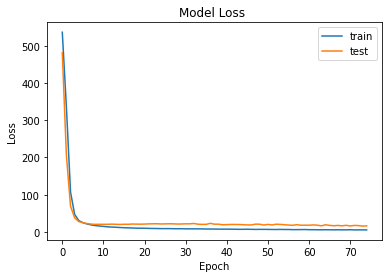

In [6]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

In [8]:
# Linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict = model.predict(x_test)

In [11]:
mean_squared_error(y_test, predict)

23.195599256423

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.